**Explanation of the dataset:** The dataset I will use contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset provides insights into each song's attributes, popularity, and presence on various music platforms. It includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features. In this dataset, I will try to predict the total number of times a track has been streamed, mainly based on the data comes from playlists, charts, and musical charachteristics.

Reference: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# examining the data set
!head spotify-2023.csv

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
Ella Baila Sola,"Eslabon Armad

In [ ]:
# loading the dataset into a pandas dataframe
df = pd.read_csv("spotify-2023.csv", header=0, sep=",", encoding="ISO-8859-1")

# I received an error when I used the defoult encoding (UTF-8); therefore, I used another encoding option.
# resource: https://saturncloud.io/blog/a-list-of-pandas-readcsv-encoding-options/

# seeing the first few lines of the data for better visualisation
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Brief description for each variable:

* track_name: Categorical. The name of the track. No
measurement units as it is text data.
* artist(s)_name: Categorical. The name of the artist or artists who performed the track.
* artist_count: Numerical (integer). The count of artists involved in the track.
* released_year: Numerical (integer). The year the track was released.
* released_month: Numerical (integer). The month the track was released.
* released_day: Numerical (integer). The day of the month the track was released.
* in_spotify_playlists: Numerical (integer). The number of Spotify playlists that include the track.
* in_spotify_charts: Numerical (integer). The rank of the track appeared in Spotify charts.
* streams: Numerical (integer). The target variable, and the dependent variable of the prediction model. The total number of times the track has been streamed, which is the outcome we aim to predict using the features in this dataset.
* in_apple_playlists: Numerical (integer). The number of Apple Music playlists that include the track.
* in_apple_charts: Numerical (integer). The rank of the track appeared in Apple Music charts.
* in_deezer_playlists: Numerical (integer). The number of Deezer playlists that include the track.
* in_deezer_charts: Numerical (integer). The rank of the track appeared in Deezer charts.
* in_shazam_charts: Numerical (integer). The rank of the track appeared in Shazam charts.
* bpm: Numerical (integer). Beats per minute of the track, a measure of tempo in music.
* key: Categorical. The musical key of the track.
* mode: Categorical. The mode of the track (e.g., major or minor).
* danceability_%: Numerical (integer). A measure of how suitable a track is for dancing, likely on a scale from 0 to 100.
* valence_%: Numerical (integer). A measure of the musical positiveness conveyed by a track, likely on a scale from 0 to 100.
* energy_%: Numerical (integer). A measure of intensity and activity in the music, likely on a scale from 0 to 100.
* acousticness_%: Numerical (integer). A measure of how acoustic a track is, likely on a scale from 0 to 100.
* instrumentalness_%: Numerical (integer). The likelihood that a track contains no vocals, likely on a scale from 0 to 100.
* liveness_%: Numerical (integer). The presence of an audience in the recording, likely on a scale from 0 to 100.
* speechiness_%: Numerical (integer). The presence of spoken words in a track, likely on a scale from 0 to 100.

In [ ]:
# data cleaning: I mainly followed and adapted these steps: https://monkeylearn.com/blog/data-cleaning-techniques/

# step 1: checking for duplicates and remove them if there is any.
duplicates = df.duplicated()
print("Number of duplicate entries:", duplicates.sum())

Number of duplicate entries: 0


In [ ]:
# step 2: checking for the formatting; ensuring a correct and consistent format.

def no_comma(column):
    if column.dtype == "object":
        # replacing commas and converting to float
        column = column.str.replace(",", "").astype(float)
    return column

# applying the conversion to all necessary columns
df["in_shazam_charts"] = no_comma(df["in_shazam_charts"])
df["in_spotify_charts"] = no_comma(df["in_spotify_charts"])
df["in_apple_charts"] = no_comma(df["in_apple_charts"])
df["in_deezer_charts"] = no_comma(df["in_deezer_charts"])
df["in_spotify_playlists"] = no_comma(df["in_spotify_playlists"])
df["in_apple_playlists"] = no_comma(df["in_apple_playlists"])
df["in_deezer_playlists"] = no_comma(df["in_deezer_playlists"])

In [ ]:
# step 3: checking for the missing values and handling them if there is any.

# count of missing values in each column
missing_count = df.isnull().sum()
print(missing_count)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [ ]:
# removing "key" as it has missing value, and I decided not to use this variable in my model
df = df.drop("key", axis=1)

In [ ]:
# removing tracks that doesn't have "in_shazam_charts" as they have missing value
df = df.dropna(subset=["in_shazam_charts"])

To handle the missing values in the "in_shazam_charts" variable I considered statistically imputing the missing values. However, none of the options (mean, median, mode) seemed suitable as "in_shazam_charts" numbers were always way higher than any other chart numbers. I believe "in_shazam_charts" is a valuable indicator for my prediction model, therefore I won't delete the whole variable. Instead, as the missing values are relatively small proportion (0,05) I will exclude the songs which didn't have the "in_shazam_charts" data.

In [ ]:
# step 4: correcting data types
df["in_deezer_playlists"] = df["in_deezer_playlists"].astype(int)
df["in_shazam_charts"] = df["in_shazam_charts"].astype(int)

In [ ]:
# model creation

# step 1: deleting the variables I decided not to use, as I don't think they have much predictive importance
columns_to_drop = [
    "track_name", "artist(s)_name", "artist_count",
    "released_year", "released_month", "released_day",
    "mode",
]
df = df.drop(columns=columns_to_drop)

In [ ]:
# step 2: creating new variables that I think will be useful, and getting rid of the old ones

# merging variables to create new "playlists" and "charts" variables
df["playlists"] = df["in_spotify_playlists"] + df["in_apple_playlists"] + df["in_deezer_playlists"]
df["charts"] = df[["in_spotify_charts", "in_apple_charts", "in_deezer_charts", "in_shazam_charts"]].mean(axis=1)

# deleting the old variables used in the merging
columns_to_drop_after_merge = [
    "in_spotify_playlists", "in_apple_playlists", "in_deezer_playlists",
    "in_spotify_charts", "in_apple_charts", "in_deezer_charts", "in_shazam_charts"
]
df.drop(columns=columns_to_drop_after_merge, inplace=True)

In [ ]:
# step 3: data investigation

#basic descriptives of the remaining variables
print(df.describe())

            streams         bpm  danceability_%   valence_%    energy_%  \
count  9.030000e+02  903.000000      903.000000  903.000000  903.000000   
mean   4.687775e+08  122.376523       67.153931   51.345515   64.334441   
std    5.196981e+08   27.876986       14.650155   23.514354   16.606740   
min    2.762000e+03   65.000000       23.000000    4.000000    9.000000   
25%    1.366830e+08   99.000000       57.000000   32.000000   53.000000   
50%    2.677896e+08  120.000000       69.000000   51.000000   66.000000   
75%    5.979611e+08  140.000000       78.000000   70.000000   77.000000   
max    3.562544e+09  206.000000       96.000000   97.000000   97.000000   

       acousticness_%  instrumentalness_%  liveness_%  speechiness_%  \
count      903.000000          903.000000  903.000000     903.000000   
mean        26.750831            1.642303   18.192691      10.280177   
std         25.863168            8.620058   13.718280      10.062119   
min          0.000000            0.0

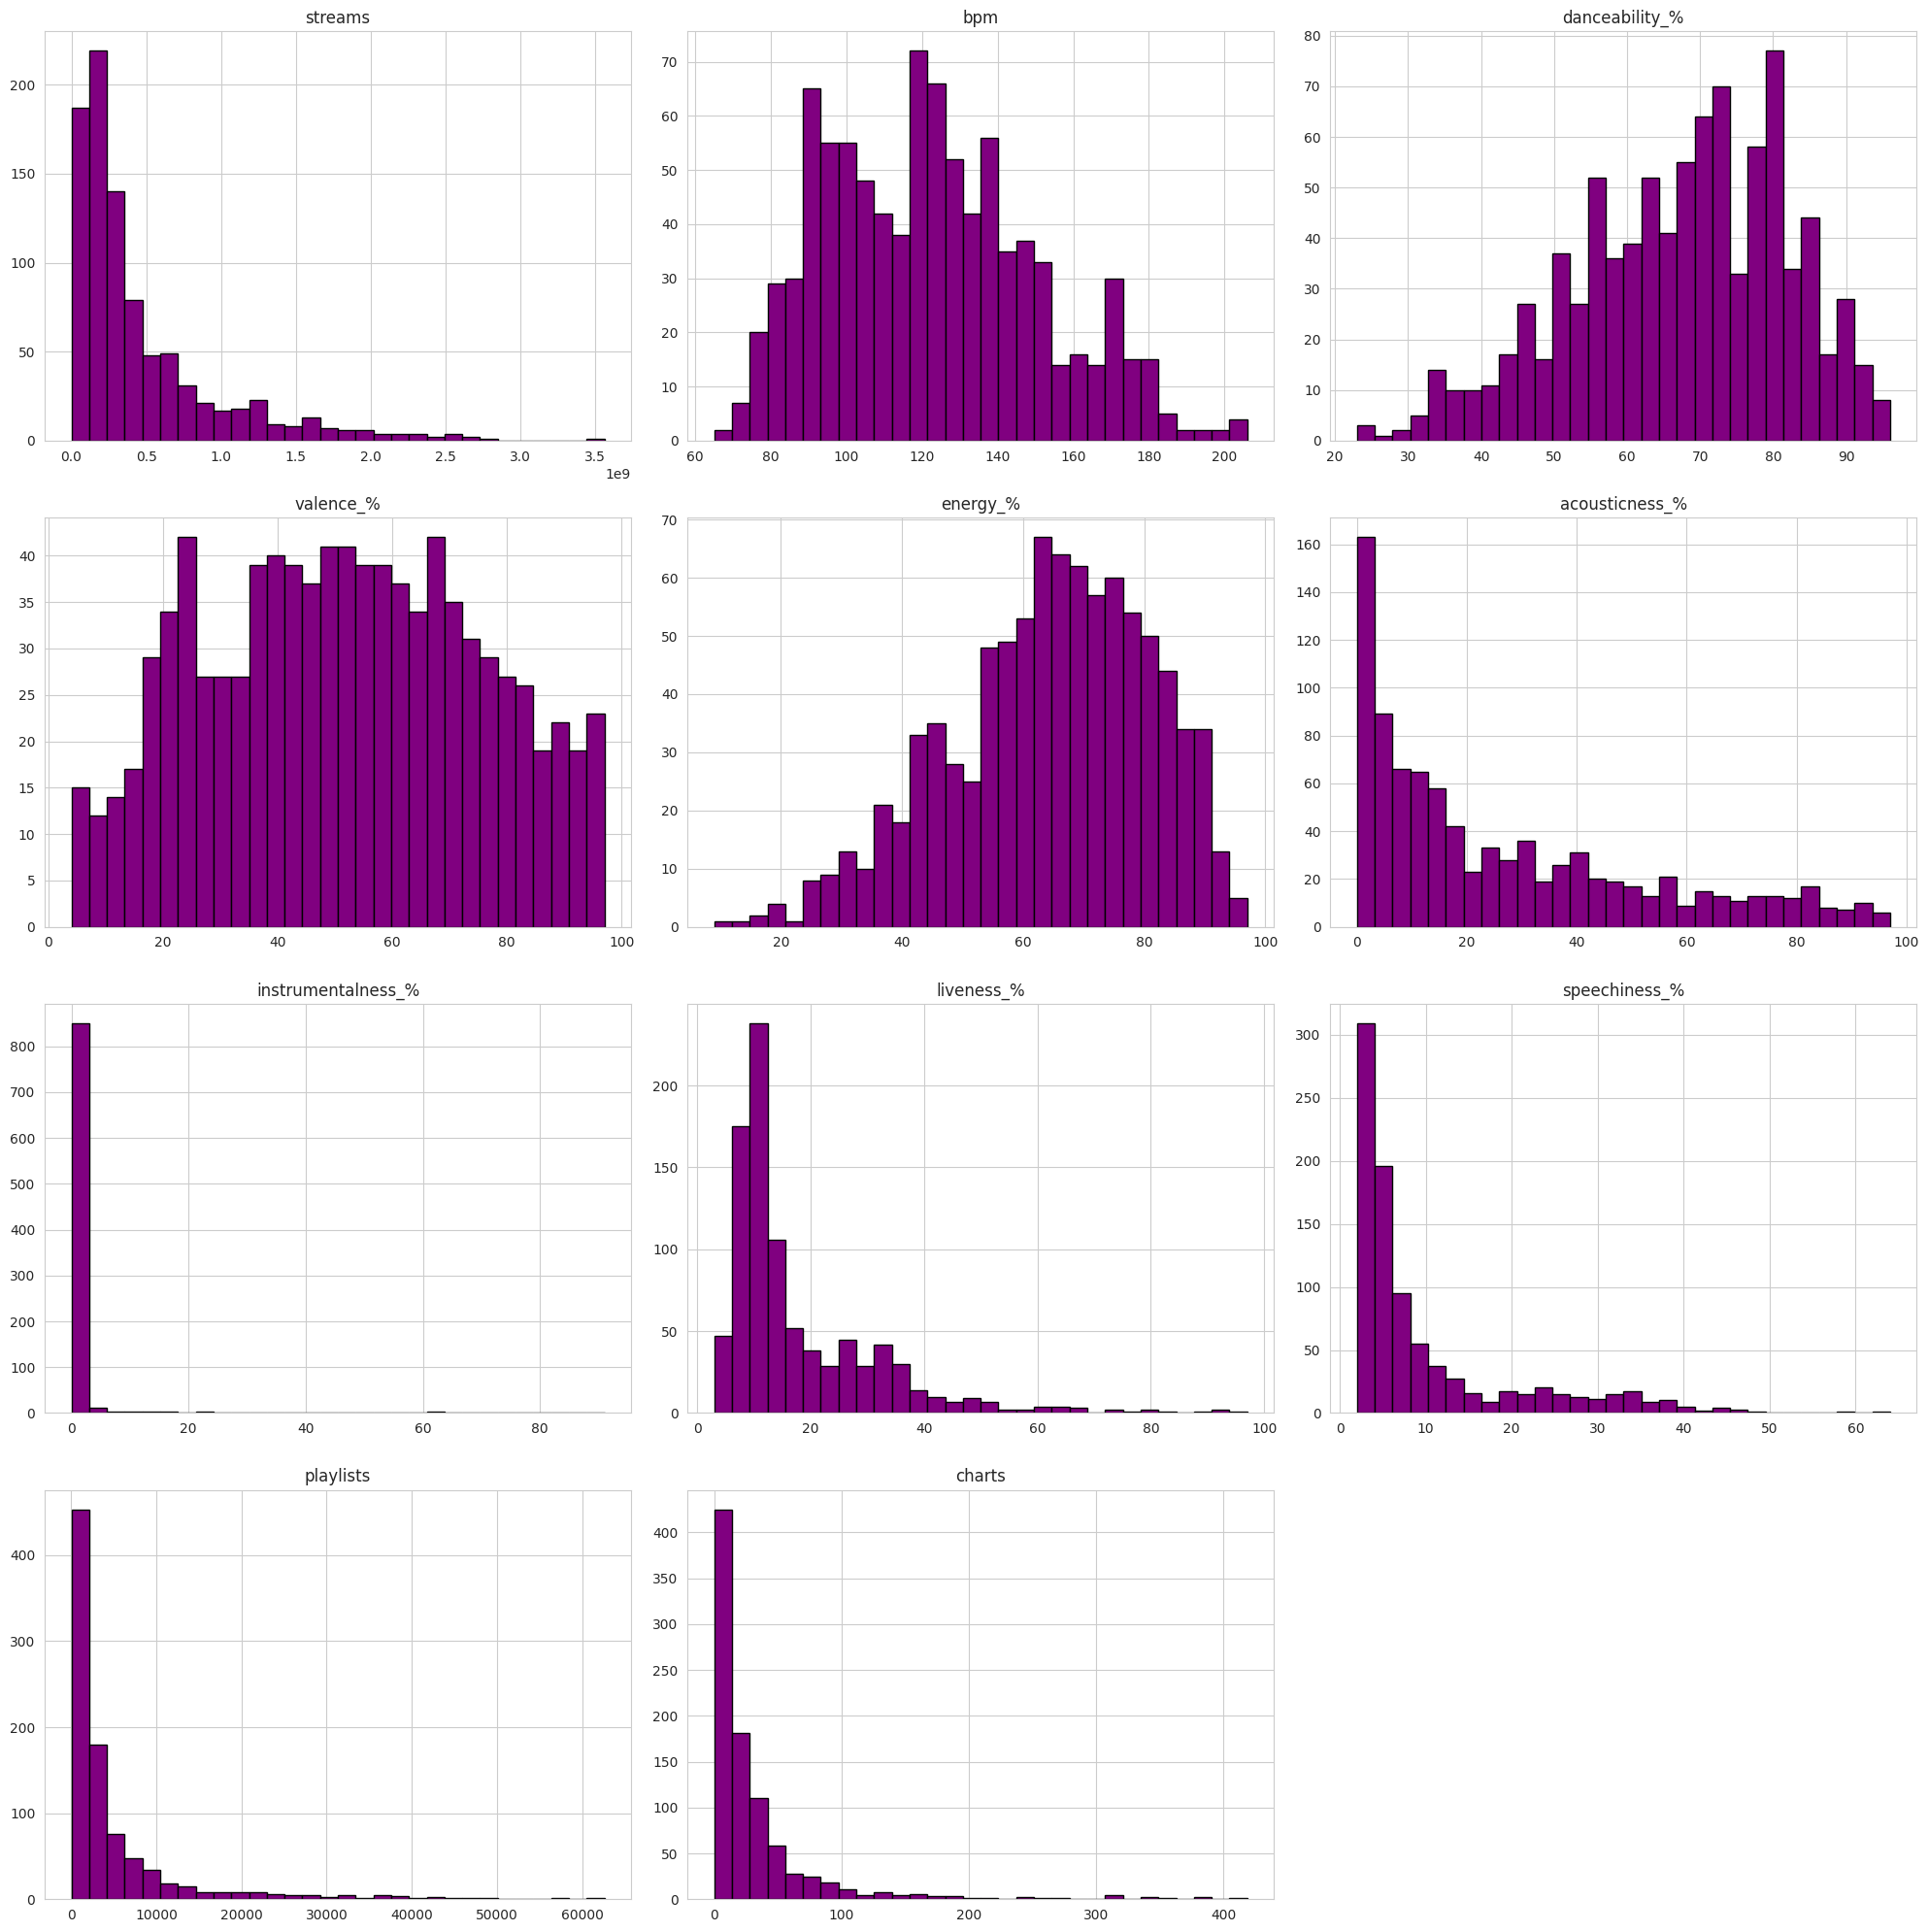

In [ ]:
# histogram of the remaining variables: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.set_style("whitegrid")

df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(20,20), color='purple', edgecolor='black')
plt.tight_layout()
plt.show()

From the charts, it seems like most songs are either not present or only appear in a few playlists or charts. However, there's a small subset of songs that seem to dominate in terms of being added to many playlists or making it to the charts. Songs range widely in bpm, but there's a peak around 80-100 bpm, indicating that a moderate tempo is quite popular. Danceability, Valence, Energy, and other % metrics display varying levels of skewness, but most of them, like danceability and energy, show a wide distribution indicating diverse musical properties.

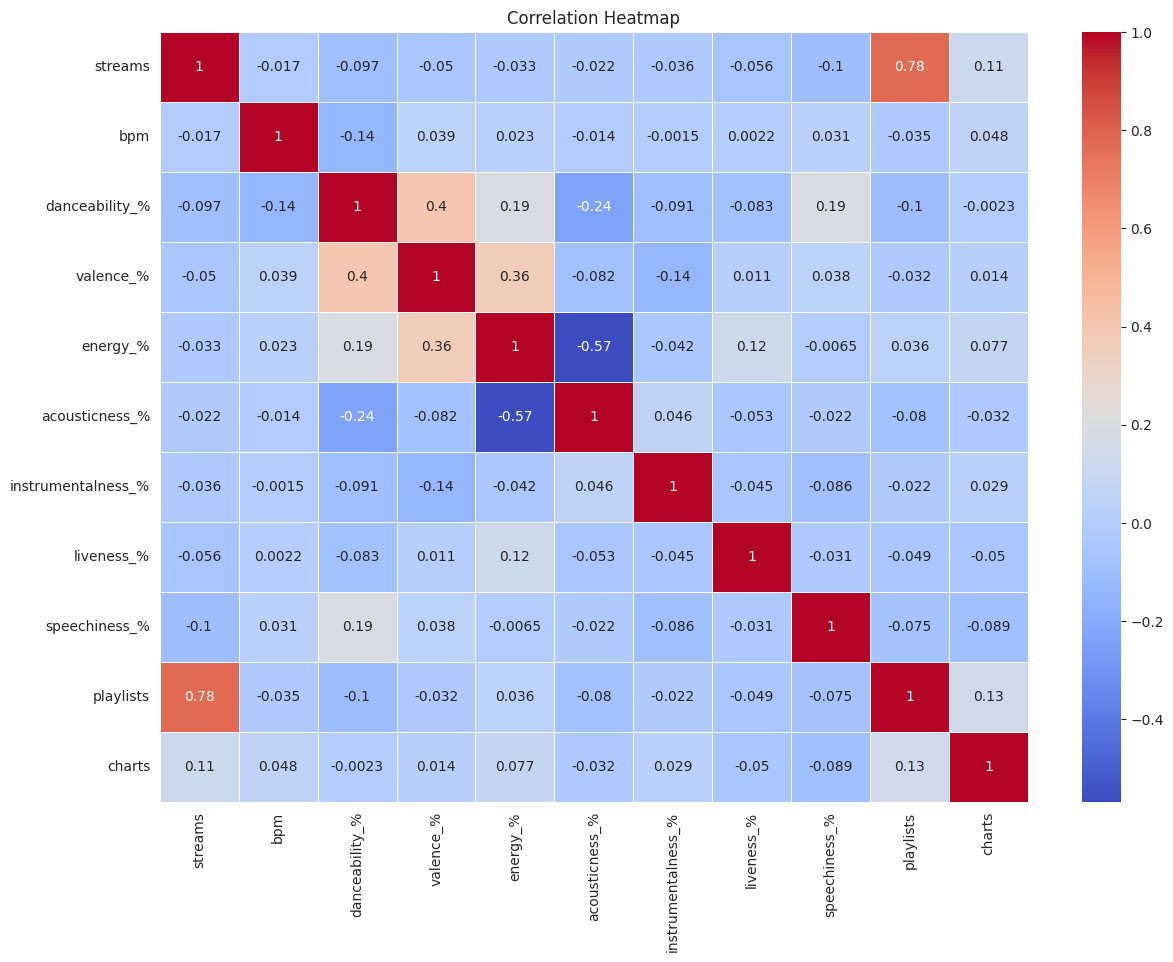

In [ ]:
# correlation heatmap to understand the relationship between variables
# reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(14, 10))
sns.heatmap(df[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
                'playlists', 'charts']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

From the map, the first thing that captures attention is the high correlation between playlists and streams. This means that the more a song is included in plyalists, the more likely that it is streamed more.

danceability% and valence% are positively correlated, suggesting tracks with high danceability often have high valence, meaning they are typically more upbeat or cheerful. energy% and valence% also show a positive correlation, meaning tracks with more energy are likely to be more positive.

Being in charts and being in playlists have positive correlations, though not extremely high. This suggests that while songs that make it to the charts are likely to be in playlists, it's not a strict guarantee.

bpm doesn't have strong correlations with most of the other features, implying that tempo isn't a significant driver for a song's presence in playlists or charts.

Text(0, 0.5, 'average streams')

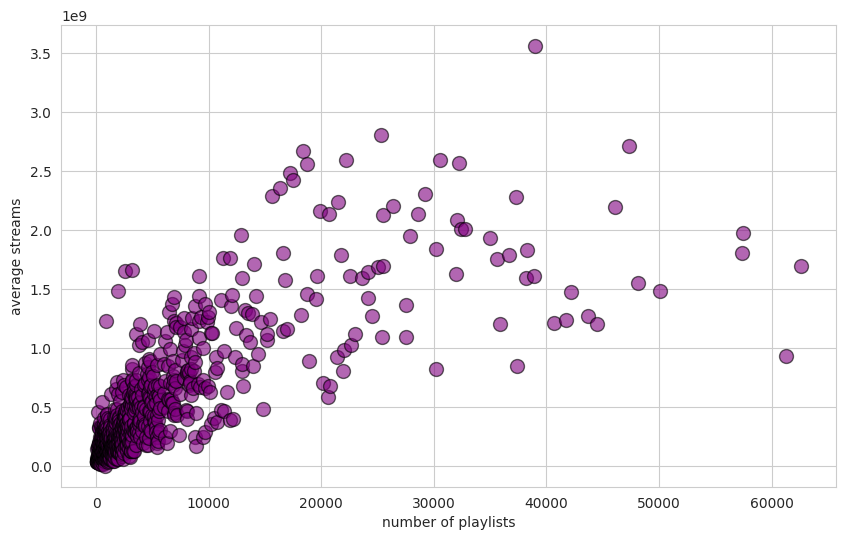

In [ ]:
# step 4: first ideas for the prediction model

# checking for the relationship between playlists, charts and streams

# grouping by the number of playlists and calculating the mean streams
grouped_data = df.groupby("playlists")["streams"].mean().reset_index()

# creating a scatterplot for better visualisation
# resource: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.figure(figsize=(10, 6))
plt.scatter(x=grouped_data["playlists"],
            y=grouped_data["streams"],
            c='purple',
            marker='o',
            alpha=0.6,
            edgecolor='black',
            s=100)

plt.xlabel("number of playlists")
plt.ylabel("average streams")


Text(0, 0.5, 'average streams')

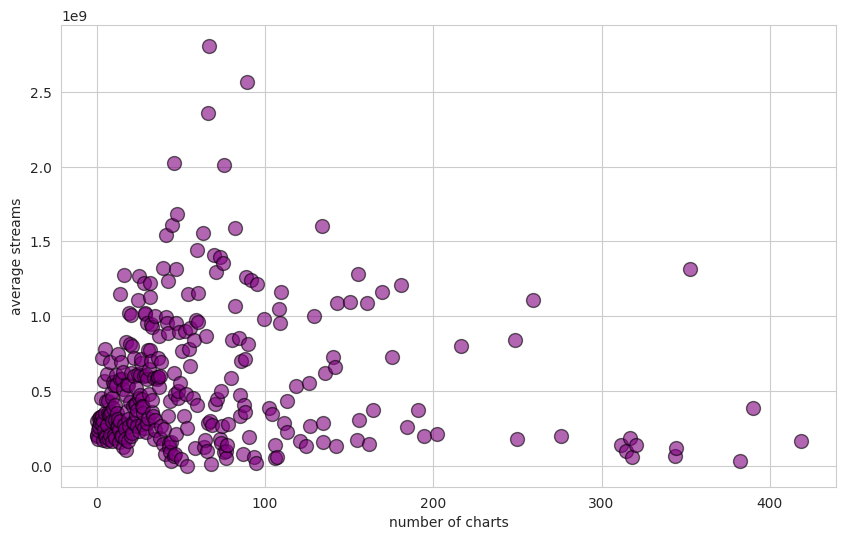

In [ ]:
# grouping by the number of charts and calculating the mean streams
grouped_data = df.groupby("charts")["streams"].mean().reset_index()

# creating a scatterplot for better visualisation
plt.figure(figsize=(10, 6))
plt.scatter(x=grouped_data["charts"],
            y=grouped_data["streams"],
            c='purple',
            marker='o',
            alpha=0.6,
            edgecolor='black',
            s=100)

plt.xlabel("number of charts")
plt.ylabel("average streams")

My first idea was using the playlists and charts to predict streams. I thought especially playlists might reflect a strong linear regression with streams, possibly enabling me to use a simple model like multiple regression analysis. I first wanted to evaluate this option as multiple regression analysis is an easy model to both implement and interpret, allowing me to efficiently tackle the issue. However, after grouping and visualising the data, I saw there is no linear relationship as I expected. Hence, I decided to consider more sophisticated tools.

In [ ]:
# step 5: cross-validation to decide which model is the best fit for the data

# resources:
# using cross validation for model comparision: https://youtu.be/fSytzGwwBVw?si=VgqeUx8kZJ9Yg3cx
# comparing different cross validation techniques: https://kili-technology.com/data-labeling/machine-learning/cross-validation-in-machine-learning#92
# determining possible suitable models: https://builtin.com/data-science/tour-top-10-algorithms-machine-learning-newbies
# applying k-fold cross-validation: https://machinelearningmastery.com/k-fold-cross-validation/
# https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/
# choosing the scoring type: https://scikit-learn.org/stable/modules/model_evaluation.html

# preparing the data
cols_to_use = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
                'playlists', 'charts']

X = df.[cols_to_use]
y = df["streams"]

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# initialising all possible models might be suitable
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# performing cross-validation
def evaluate_model(model, X, y, kf):
    mse = -cross_val_score(model, X, y, cv=kf, scoring="r2")
    return np.sqrt(mse)  # returning RMSE

# evaluating each model
results = {}
for name, model in models.items():
    rmse = evaluate_model(model, X, y, kf)
    results[name] = rmse.mean()
    print(f"{name}: Average RMSE = {rmse.mean()}")


Linear Regression: Average RMSE = 322917886.08807915
Decision Tree: Average RMSE = 376583275.1626238
Random Forest: Average RMSE = 273450520.3833432
SVM Regressor: Average RMSE = 549510466.2956693
Gradient Boosting: Average RMSE = 271221638.1083592


I decided to use k-fold cross-calidation to compare different models and decide which one fits best to my data, as it seemed robust by averaging multiple estimates. I have decided to go with k=10 instead of k=5 (two most common approaches: see the references) because of the considerations on efficency and speed.

Gradient Boosting has the closest value to zero, hence I will use it to predict streams.

In [ ]:
# step 6: applying the chosen prediction model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

# preparing the data
X = df[cols_to_use]
y = df["streams"]

# splitting the data
# I divided the data as 20% test and 80% training because it is one of the most common ways to split the data,
# and it seemed to be suitable for my model.
# resource: https://www.techtarget.com/searchenterpriseai/definition/data-splitting#:~:text=The%20original%20data%20in%20a,used%20to%20train%20the%20model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialising and training Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# prediction and evaluation
y_pred = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score: {r2}")

Root Mean Squared Error (RMSE): 240941138.00096294
R-squared Score: 0.7085063269490832


I got r2=0.708, which means the around 71% of the varience in streams is explained by the columns I used with my model. First I will see which columns were important for my prediction, then I will try to improve my model.

In [ ]:
# retriving feature importance from the model to see which ones are important
feature_importances = gbr.feature_importances_
features_df = pd.DataFrame({
    'Feature': cols_to_use,
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))

Feature Importances:
              Feature  Importance
8           playlists    0.852571
9              charts    0.037778
2           valence_%    0.029905
1      danceability_%    0.017909
6          liveness_%    0.016674
3            energy_%    0.016503
4      acousticness_%    0.015124
0                 bpm    0.009480
7       speechiness_%    0.003205
5  instrumentalness_%    0.000851


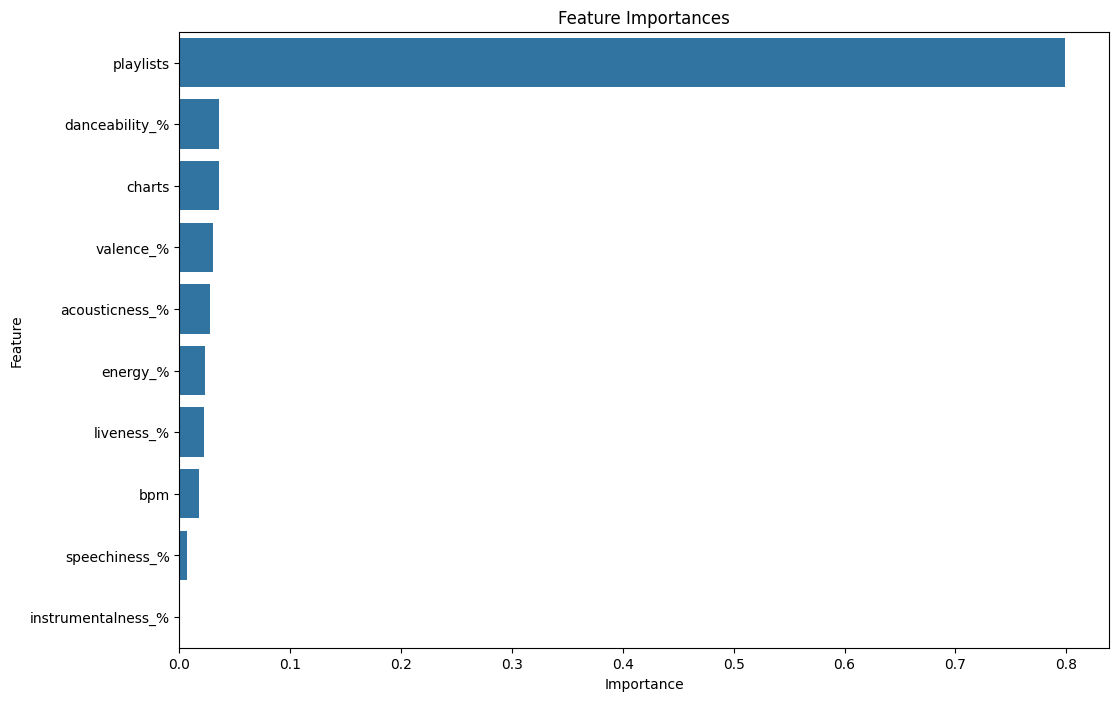

In [ ]:
# visualising Feature Importances
df_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances)
plt.title('Feature Importances')
plt.show()

Playlists is a really good indicator for streams, however the rest of the data doesn't seem to hold much indicative value.

In [ ]:
# step 7: improving the model by parameter tuning: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

X = df[cols_to_use]
y = df["streams"]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    "n_estimators": [500],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3]
}

# initialising GridSearchCV
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring="r2", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best model
print("Best parameters:", grid_search.best_params_)
best_gbr = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score: {r2}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Root Mean Squared Error (RMSE): 238005627.9215868
R-squared Score: 0.721772499712624


Before reaching this final definition of the parameter grid, I kept playing with the parameter numbers, adding and removing different numbers and ranges, etc. In order to prevent the model overload and take too much time to remove, I later deleted some of the ranges and numbers tat didn't match with the best parameters. After spending a lot of time playing with it, 0.72 was the best I could get.

Reflection:

The final conclusion of this model: In this data set, my Gradient Boosting Regressor can explain 72% of the varience in number of streams by using the following variables: charts, playlists, bpm, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, and speechiness_%; which refer to substantially good prediction (resource: https://www.investopedia.com/terms/r/r-squared.asp#:~:text=In%20finance%2C%20an%20R%2Dsquared,depend%20on%20the%20specific%20analysis)

There might be several reasons why my model didn't have a higher r2 value or it didn't develop much after the parameter optimisation. First, I might not have done the data cleaning good enough. Even though I tried to do everything I could possibly think of, I think I overlooked some points, didn't considered or wasn't aware of some options, etc. that affected the data quality, as demonstrated by the high RMSE values.

Second, I might not have tackled the parameter optimisation effectively. This process is new to me, hence I might have overlooked some smart ways to redefine the parameters that would fit my data better.

Third, the variables I used might not be comprehensively explaining the number of streams. Especially when feature importance is considered, none of them except playlists didn't hold much indicative value. I chose not to use any data related artists, release time, key, or mode because I wasn't interested in them. But if I included them they might have contributed to the proportion of explained variance, making my prediction more trustworthy. Therefore, I could have tried using all variables available.

Fourth, the sample size (n=903) might not be ideal. The more data I have, the more data I can use to train my model,  the better prediction it makes. Therefore, if I had more data, my model could have worked better.

Finally, although I used cross-validation to wisely choose which model to use for my prediction, I did not add every single option in my cross-validation. For example, I left deep learning out as I didn't feel very comfortable with it, however it might have been a better fit for my model, explaining a greater amount of variance.

For the next time, I plan to learn more on data cleaning and spend more time on it to increase the data quality. I also plan to work with a larger dataset and more variables. Additionally, I plan to improve my abilities in different machine learning algorithms, such as learning more on parameter optimisation or additional models so I can have more opportunity to come up with a better model.
